In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Happy $2^{10}$ Day!
  - Quiz 6 this week. 
    - Find critical points.
    - Classify them.
    - Constrained optimization.
  - Homework 8 due Tuesday
    

# One-minute Review

  - A double integral over a region $\mathcal D$ is a limit of Riemann sums 
  $$\iint_\mathcal{D} f(x,y)\,dA = \lim_{M,N\to \infty} \sum_{i=1}^M \sum_{j=1}^N f(x_{ij}^*,y_{ij}^*)\, \Delta A_{ij} $$

where $(x_{ij}^*,y_{ij}^*)$ is a sample point in the $ij$th subrectangle contained in $\mathcal{D}$ and $\Delta A_{ij}$ is the area of the $ij$th subrectangle (often $\Delta x\Delta y$).

  - Fubini's Theorem states that for a continuous $f$ on a rectangle $[a,b]\times[c,d]$, the double integral is equal to the iterated integral. $$\iint_\mathcal D f dA = \int_a^b \int_c^d f(x,y) dy dx$$
  
  

# Lecture 15

  - Objectives
    - Integration
      - See examples using polar coordinates.
      - Applications of integration:
        - Center of mass
        - Moment of intertia
        - Probability
      - Preview triple integrals.
    
  - Resources
    - Content
      - Stewart: §15.3–4
      - New Strang:  [§5.3](https://openstax.org/books/calculus-volume-3/pages/5-3-double-integrals-in-polar-coordinates) [§5.6](https://openstax.org/books/calculus-volume-3/pages/5-6-calculating-centers-of-mass-and-moments-of-inertia)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L15.ipynb) via JupyterHub
    - Practice
      - Mooculus: [Polar Coordinates](https://ximera.osu.edu/mooculus/calculus3/commonCoordinates/digInPolarCoordinates) [Mass and Moments](https://ximera.osu.edu/mooculus/calculus3/computationsAndInterpretations/digInMassMomentsAndCenterOfMass)
    - Extras
      - CalcBLUE: [Integrals](https://www.math.upenn.edu/~ghrist/BLUE.html#VOL3) 

## Converting integrals to polar coordinates. 

Let $\mathcal{D}$ be the polar region defined by $r_1 \leq r \leq r_2, \theta_1 \leq \theta \leq \theta_2 $ and $f(x,y)$ a continuous function on $\mathcal D$. Then,

$$\iint_\mathcal D f dA = \int_{\theta_1}^{\theta_2} \int_{r_1}^{r_2} f(r \cos \theta,r \sin \theta )\,r\,dr\,d\theta$$ 



Remember to convert all parts of the integral:
  - the limits of integration
  - the integrand
  - the differential

In [63]:
@interact
def _(s=(0,1,.02)):
    fig = plt.figure(figsize=(12,6))
    ax= fig.add_subplot(121)
    ax2 = fig.add_subplot(122,projection='3d')
    r = np.linspace(1,2,8)
    th = np.linspace(0,pi/3,8)
    t = np.linspace(0,1,26)
    for x in r:
        ax.plot(x*np.ones_like(t),t*pi/3,'k')
    for y in th:
        ax.plot(1+t,y*np.ones_like(t),'k')

    ax.set_xlim([0,2.5])
    ax.set_ylim([0,2.5])
    ax2.set_xlim3d([0,2.5])
    ax2.set_ylim3d([0,2.5])

interactive(children=(FloatSlider(value=0.0, description='s', max=1.0, step=0.02), Output()), _dom_classes=('w…

In [5]:
@interact
def _(s=(0,1,.1),angle=(-127,6,6)):
    fig = plt.figure(figsize=(12,6))
    ax= fig.add_subplot(121)
    ax2 = fig.add_subplot(122,projection='3d')
    r = np.linspace(1,2,8)
    th = np.linspace(0,pi/3,8)
    t = np.linspace(0,1,26)
    for x in r:
        ax.plot((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)),'k')
    for y in th:
        ax.plot((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y),'k')

    for x in r:
        ax2.plot((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)),0*t,'k')
    for y in th:
        ax2.plot((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y),0*t,'k')
        
    for a in [ax,ax2]:
        if s == 0:
            a.set_xlabel('$r$',fontsize=20)
            a.set_ylabel('$\\theta$',fontsize=20)
        elif s == 1:
            a.set_xlabel('$x$',fontsize=20)
            a.set_ylabel('$y$',fontsize=20)
        else:
            a.set_xlabel(' ',fontsize=20)
            a.set_ylabel(' ',fontsize=20)
            
    R,TH = np.meshgrid(r,th)
    
    X = (1-s)*R + s*(R*cos(TH))
    Y = (1-s)*TH + s*(R*sin(TH))
    Z = 1 + R*cos(TH) + R*sin(TH)
    ax2.plot_surface(X,Y,Z,cmap='rainbow')
    ax2.view_init(35,angle)
   
    ax.set_xlim([0,2.5])
    ax.set_ylim([0,2.5])
    ax2.set_xlim3d([0,2.5])
    ax2.set_ylim3d([0,2.5])

interactive(children=(FloatSlider(value=0.0, description='s', max=1.0), IntSlider(value=-61, description='angl…

## Examples

  1. Find the volume under a paraboloid $z=a-x^2-y^2$ and above $z=0$ in terms of $a$ where $a>0$.
  

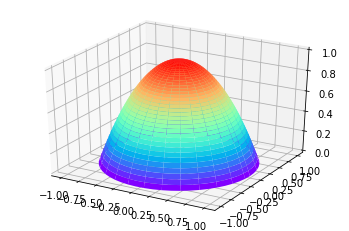

In [25]:
ax = plt.gca(projection='3d')
r = np.linspace(0,1,40)
th = np.linspace(0,2*pi,56)
r,th = np.meshgrid(r,th)
X = r*cos(th)
Y = r*sin(th)
Z = 1 - r**2
ax.plot_surface(X,Y,Z,cmap='rainbow');


  2. Sketch the region of integration in the definite integral below and then evaluate it using polar coordinates.  $$\int_0^1\int_{\sqrt{1-x^2}}^{\sqrt{4-x^2}} x\,dy\,dx + \int_1^2\int_{0}^{\sqrt{4-x^2}} x\,dy\,dx$$
  

  3. Find the volume of the region above the $xy$-plane, under the surface $z=x^2+y^2$ and inside the cylinder $x^2 +(y-1)^2 =1$.
  

### Cool Example

Compute $$\int_{-\infty}^\infty e^{-x^2}\,dx.$$

See homework 8. 

# Applications of Integration

The basic principal behind applying integration is that the desired quantity, the _desideratum_, is obtained by integrating its _elements_. Put plainly,
$$\spadesuit = \int d\spadesuit$$

## A Word on Density

"Density" often stands in for mass density which has units of mass/volume, like $\frac{{\rm g}}{{\rm ml}}$. 

But think of it more generally as $$\frac{\rm stuff}{\rm unit\ of\ measure}$$

Further, these can vary continuously throughout a medium or space. Thus, we integrate to find the total amount of "stuff". 

### Examples

  - Resistivity $\rho(x)$ along a wire. $\frac{\Omega}{{\rm m}}$. $$\Omega = \int_0^\ell \rho(x)\, dx$$
  - Probability density function $\rho(x,y)$ of two random variables. $$P(E) = \iint_E \rho(x,y)\, dA$$
  - Concentration of chemicals, like $[\text{H}_2\text{CO}_3] = \rho(x,y,z)$. $$\text{total carbonic acid} = \iiint_D \rho(x,y,z)\,dV$$

## Masses and Moments

Let consider a planar region $\mathcal D$ (a "lamina") with continuously varying density (mass per unit area) $\rho(x,y)$. The the total mass is given by $$M = \iint_D \rho(x,y)\,dA$$ 

The **center of mass** $(\bar{x},\bar y)$ is the "(weighted) average position" of the mass in the object. 
$$(\bar{x},\bar y) = \left(\frac{M_y}{M},\frac{M_x}{M}\right)$$ 

where 

$$ M_y = \iint_\mathcal D x \rho(x,y)\,dA$$ 

$$ M_x = \iint_\mathcal D y \rho(x,y)\,dA$$

are the **first moments** relative to the $y-$ and $x-$axis, respectively.

### Example

Find the center of mass of the unit square $[0,1]\times [0,1]$ whose density is given by $\rho(x,y) = x+y$ 

In [53]:
@interact
def _(show=False):
    x = y = np.linspace(0,1,100)
    x,y = np.meshgrid(x,y)

    plt.figure(figsize=(8,8))
    plt.pcolormesh(x,y,x+y,cmap='rainbow')
    plt.xlim([0,1.5])
    plt.ylim([0,1.5])
    if show:
        plt.scatter([7/12],[7/12])


interactive(children=(Checkbox(value=False, description='show'), Output()), _dom_classes=('widget-interact',))

In [56]:
rho = lambda x,y: x+y

dblquad(lambda x,y: (x+y),0,1,0,1)[0]

1.0

### Exercise

Take the top half of the annulus $\{(x,y) \mid 1 \leq x^2 + y^2 \leq 4\}$. Does this region contain its **centroid** (center of mass with uniform density)?

## Moment(s) of Inertia

The **moment of inertia** $I$ of a massive body is a measure of its "resistance to rotation" about a given axis. 

Angular momentum is  $L=I\omega$, the product of the moment of inertia and the angular velocity.

![Figure skater spinning](http://giphygifs.s3.amazonaws.com/media/RmuN3xF9sBpL2/giphy.gif)

The figure skater pulls her body in to reduce her moment of intertia. As angular momentum is conserved, she spins faster.

### Formula

$I$ is a measurement of how far the mass is spread from the axis. It is the second moment of the density distribution. 

If we take a body $\mathcal D$ in the plane with area density $\rho(x,y)$, and consider it rotating about the origin, then

$$ I = \iint_\mathcal D (x^2+y^2)\rho(x,y)\,dA $$

that is, the distance to the axis squared, weighted by mass. 


#### Exercise

Set up integrals to compute the moments of inertia for the annular region above about 

  - the origin
  - the $x$-axis
  - the line $y=-1$.

![The region D spinning abut the z-axis in 3 different configurations.](constant_L.gif)

# Probability

Two (real) random variables $X$ and $Y$ have a joint probability density function $\rho(x,y)$. This is simply a function on the plane with $\rho(x,y) \geq 0$ and 

$$\iint_{\RR^2} \rho(x,y)\,dA = 1.$$

An **event** $E \subset \RR^2$ is just a subset of the sample space, and its probability is 

$$P(E) = \iint_E \rho(x,y)\,dA$$.

## Example

Suppose a straw is creased at two random points along its length. What is the probability the three resulting sections can be folded into a triangle?

In [61]:
v = np.random.rand(2)


@interact
def _(t=(0.,1.)):
    v.sort()
    x,y = v
    
    a = x
    b = y-x
    c = 1-y
    
    if ((a**2+b**2 - c**2)/(2*a*b))**2 <= 1:
        alpha = np.arccos((a**2+b**2 - c**2)/(2*a*b))
    else:
        alpha=0
    if ((-a**2+b**2 + c**2)/(2*c*b))**2 <= 1:
        beta = np.arccos((-a**2+b**2 + c**2)/(2*c*b))
    else:
        beta=0
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.plot([a+a*cos((1-t)*pi + t * alpha),a,y,y-c*cos((1-t)*pi + t * beta)],[a*sin((1-t)*pi + t * alpha),0,0,c*sin((1-t)*pi + t * beta)])
    ax.set_xlim([-.1,1])
    ax.set_ylim([-.1,1])
    ax.axis('off')
    ax.scatter([x,y],[0,0])


interactive(children=(FloatSlider(value=0.5, description='t', max=1.0), Output()), _dom_classes=('widget-inter…

## The Moments 

Moment measurements have analogous meaning in the probability context.

The "center of mass" is in fact the **expected value** of the variables.

$$(\bar{x},\bar{y}) = \left( \iint_{\RR^2} x \rho(x,y)\,dA,\iint_{\RR^2} y \rho(x,y)\,dA\right) $$

The second moments (relative to this center) give the **variances** of the respected variables. 

$$(\sigma_x^2,\sigma_{y}^2) = \left( \iint_{\RR^2} (x-\bar{x})^2 \rho(x,y)\,dA,\iint_{\RR^2} (y-\bar{y})^2 \rho(x,y)\,dA\right) $$

The list goes on 

  - mixed moments $\to$ covariance
  - 3rd moments $\to$ skewedness
  - 4th moments $\to$ kurtosis
  - $\ldots$